<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_16_sklearn/HW_16_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


In [ ]:
housing = fch()
housing

In [3]:
X, y = fch(return_X_y=True, as_frame=True)
print(X.head(5))
print(y.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [4]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


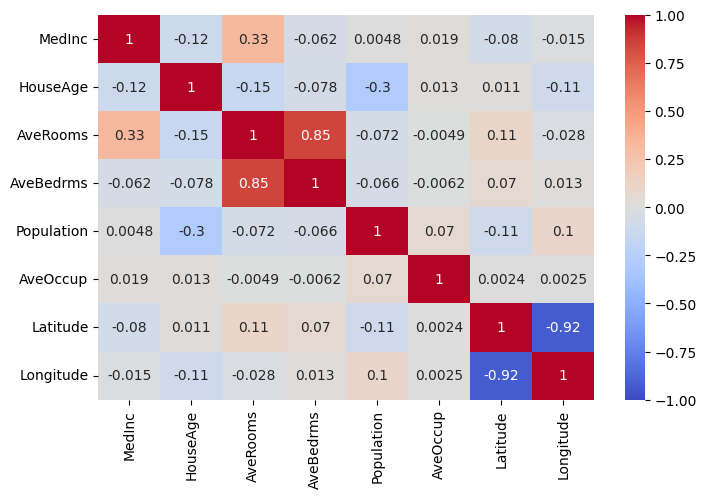

In [9]:
plt.rcParams['figure.figsize']=(8,5)
sns.heatmap(X.corr(numeric_only=True), vmin = -1, annot= True, cmap='coolwarm')
plt.show()

на матрице видим большую корреляцию для AveBedrms и AveRooms. Для модели - оставим только AveRooms.

Тоже самое видно для Latitude и	Longitude (для них посмотроим график и решим, какой из них оставим)


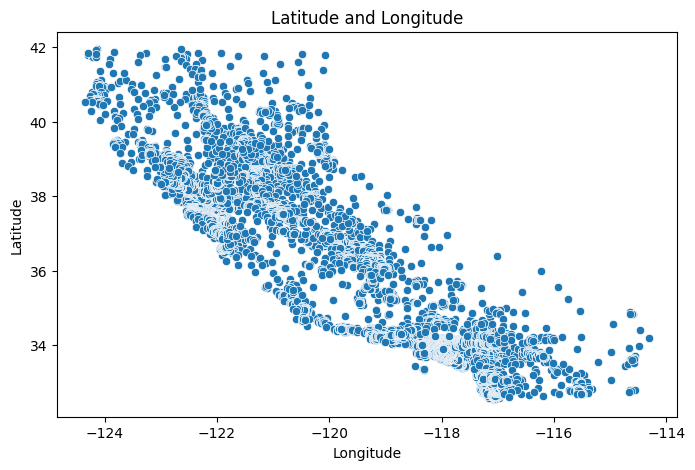

In [11]:
sns.scatterplot(data=X, x='Longitude', y='Latitude', legend=True)
plt.title('Latitude and Longitude')
plt.show()

<Figure size 800x500 with 0 Axes>

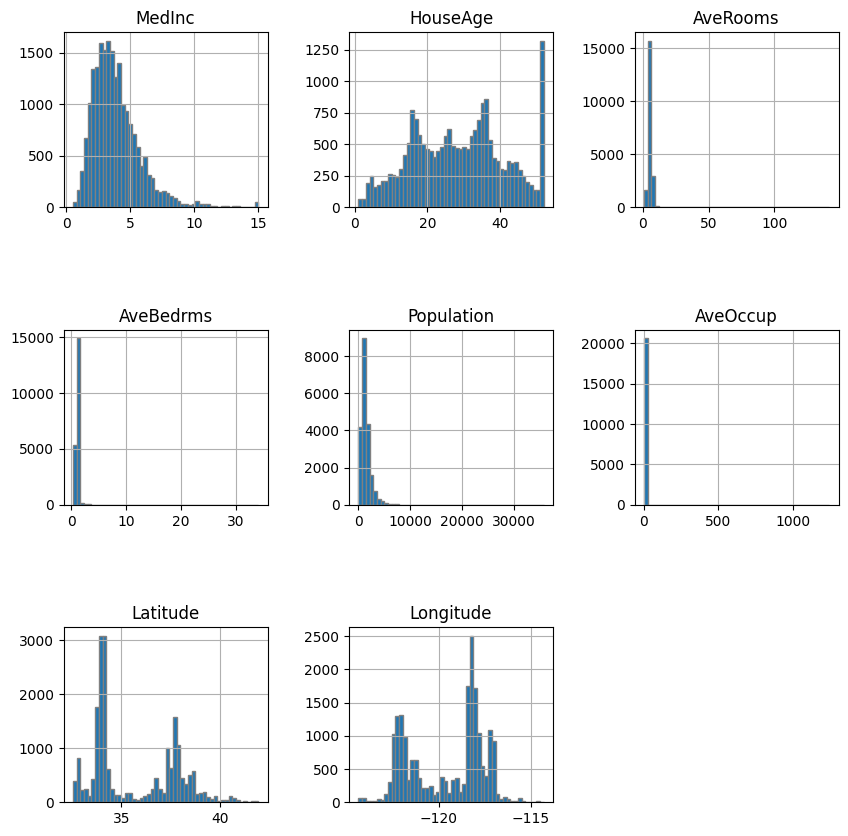

In [18]:
plt.suptitle('Histigrams')
X.hist(figsize=(10, 10), bins=50, edgecolor="gray")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


разбиваем датасет

In [22]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, random_state=33, test_size=0.25)
X_tr.shape, X_t.shape

((15480, 8), (5160, 8))

In [35]:
# сначала построим Линейную регрессию по всем фичам
l_reg = linear_model.LinearRegression().fit(X_tr, y_tr)
print(f"Coef: \n{l_reg.coef_}")

y_t_pred = l_reg.predict(X_t)
y_tr_pred = l_reg.predict(X_tr)
print(f"\nScore for Train dataset: {l_reg.score(X_tr, y_tr)}")
print(f"Score for Test dataset: {l_reg.score(X_t, y_t)}")
print(f'MSE = {mean_squared_error(y_t, y_t_pred)}')

Coef: 
[ 4.39821431e-01  8.76836617e-03 -1.10432914e-01  6.49236021e-01
 -9.96433215e-06 -3.35497814e-03 -4.23132587e-01 -4.37192643e-01]

Score for Train dataset: 0.5987322242957205
Score for Test dataset: 0.6278442853970023
MSE = 0.5029566566030709


In [25]:
print(y_tr)
print(y_pred_tr)

16804    3.276
11388    2.949
3349     2.000
10308    3.549
18737    0.816
         ...  
10435    2.406
57       0.853
578      2.486
5848     1.813
2439     0.927
Name: MedHouseVal, Length: 15480, dtype: float64
[2.52337981 3.114552   0.36866459 ... 2.52751044 1.82844498 0.85825487]
